# Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

### Component Type

- 체계적 구성 요소 (systematic components)
    Level : series의 평균값.  
    Trend : 연속된 time point들 간의 value change. 기울기 존재.  
    Seasonality : 단기적 cycle을 반복하며 평균에서 벗어나는 것.  
    

- 비체계적 구성 요소 (non-systematic components)  
    Noise
    
    
- Additive model  

    - 𝑦(𝑡)=𝑙𝑒𝑣𝑒𝑙+𝑡𝑟𝑒𝑛𝑑+𝑠𝑒𝑎𝑠𝑜𝑛𝑎𝑙𝑖𝑡𝑦+𝑛𝑜𝑖𝑠𝑒 의 형태  
    - Linear model  
    - linear trend, linear seasonality  
    

- Multiplicative model  

    - 𝑦(𝑡)=𝑙𝑒𝑣𝑒𝑙∗𝑡𝑟𝑒𝑛𝑑∗𝑠𝑒𝑎𝑠𝑜𝑛𝑎𝑙𝑖𝑡𝑦∗𝑛𝑜𝑖𝑠𝑒 의 형태  
    - Non-linear model  
    - non-linear trend, non-linear seasonality

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

miles_df = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv', 
                                  header=0 , parse_dates=[0])

miles_df.set_index('Month', inplace=True)
miles_df.head()

MilesMM
Month              
1963-01-01     6827
1963-02-01     6178
1963-03-01     7084
1963-04-01     8162
1963-05-01     8462

In [29]:
miles_decomp = miles_df.copy()

### `seasonal_decompose()`의 결과를 plot하면 4개의 sub-plot 생성
    1. Observed - original price
    2. Trend
    3. Seasonality
    4. Residual
    
- model 을 `additive`와 `multiplicative`로 한 경우 3 번째 seasonal 과 4 번째 residual chart 의 y value 눈금의 숫자가 model 에 따라 다르게 표시

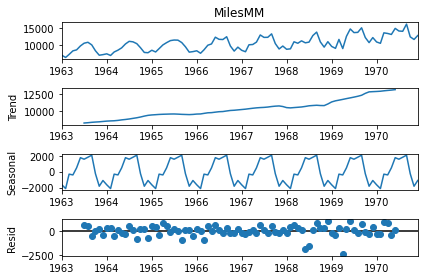

In [30]:
result = seasonal_decompose(miles_decomp['MilesMM'], model='additive')
result.plot()
plt.show()

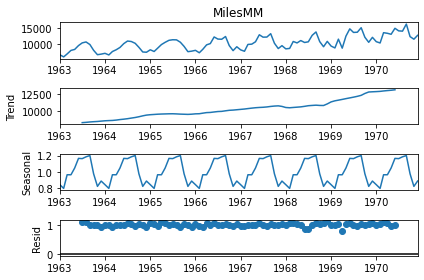

In [31]:
result2 = seasonal_decompose(miles_decomp['MilesMM'], model='multiplicative')
result2.plot()
plt.show()

# Differencing (차분)

- trend 와 seasonality 를 제거

In [69]:
miles_diff = miles_df.copy()

In [70]:
miles_diff.head()

MilesMM
Month              
1963-01-01     6827
1963-02-01     6178
1963-03-01     7084
1963-04-01     8162
1963-05-01     8462

In [71]:
miles_diff['lag1'] =  miles_diff['MilesMM'].shift(1)
miles_diff.head()

MilesMM    lag1
Month                      
1963-01-01     6827     NaN
1963-02-01     6178  6827.0
1963-03-01     7084  6178.0
1963-04-01     8162  7084.0
1963-05-01     8462  8162.0

In [72]:
miles_diff['MilesMM_diff_1'] = miles_diff['MilesMM'].diff(periods=1)
miles_diff.head()

MilesMM    lag1  MilesMM_diff_1
Month                                      
1963-01-01     6827     NaN             NaN
1963-02-01     6178  6827.0          -649.0
1963-03-01     7084  6178.0           906.0
1963-04-01     8162  7084.0          1078.0
1963-05-01     8462  8162.0           300.0

- 원래의 `MilesMM` data 는 뚜렷한 Trend 와 Seasonality 를 보이고, 이 것을 `seasonal_decompose` plot을 통해 확인 가능

<AxesSubplot:xlabel='Month'>

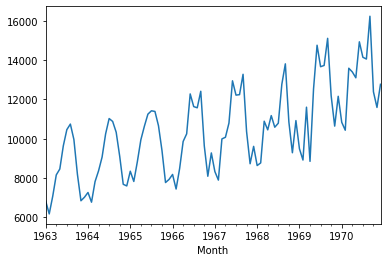

In [80]:
miles_diff['MilesMM'].plot()

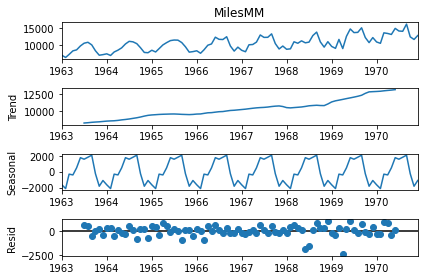

In [81]:
result = seasonal_decompose(miles_diff['MilesMM'])
result.plot()
plt.show()

### Trend 제거

<AxesSubplot:xlabel='Month'>

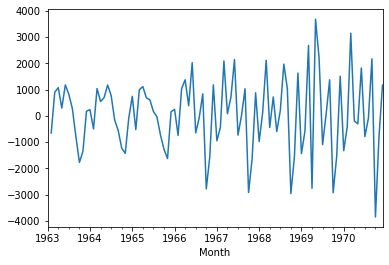

In [85]:
miles_diff['MilesMM_diff_1'].plot() 

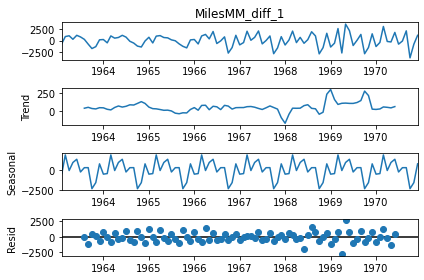

In [86]:
result = seasonal_decompose(miles_diff.iloc[1:, 2])
result.plot()
plt.show()

`MilesMM`을 차분한 `MilesMM_diff_1` 은 Trend 는 제거되었으나 여전히 seasonality는 남아 있다.
Seasonality 제거를 위해 12 개월로 차분.

In [87]:
miles_diff['MilesMM_diff_12'] = miles_df['MilesMM'].diff(periods=12)
miles_diff.head()

MilesMM    lag1  MilesMM_diff_1  MilesMM_diff_12
Month                                                       
1963-01-01     6827     NaN             NaN              NaN
1963-02-01     6178  6827.0          -649.0              NaN
1963-03-01     7084  6178.0           906.0              NaN
1963-04-01     8162  7084.0          1078.0              NaN
1963-05-01     8462  8162.0           300.0              NaN

<AxesSubplot:xlabel='Month'>

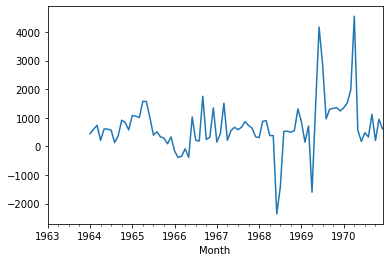

In [88]:
miles_diff['MilesMM_diff_12'].plot() 

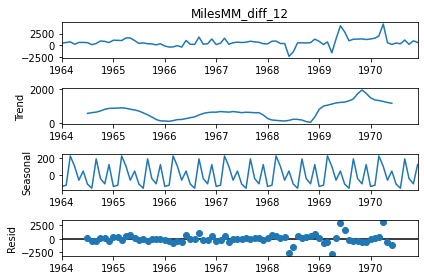

In [89]:
result = seasonal_decompose(miles_diff.iloc[12:, 3])
result.plot()
plt.show()

12 개월 차분 결과 trend와 seasonality가 모두 제거되었다.